<a href="https://colab.research.google.com/github/ansh441/wineTypeDetector/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import *


white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')


In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
red.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
618,11.4,0.460,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.2,5
246,7.1,0.680,0.07,1.9,0.075,16.0,51.0,0.99685,3.38,0.52,9.5,5
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5
1177,7.1,0.660,0.00,2.4,0.052,6.0,11.0,0.99318,3.35,0.66,12.7,7
1342,7.6,0.540,0.02,1.7,0.085,17.0,31.0,0.99589,3.37,0.51,10.4,6
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6
416,10.6,0.480,0.64,2.2,0.111,6.0,20.0,0.99700,3.26,0.66,11.7,6
1007,9.1,0.300,0.34,2.0,0.064,12.0,25.0,0.99516,3.26,0.84,11.7,7
784,7.1,0.590,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8,5


In [7]:
white.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1645,7.5,0.240,0.49,9.4,0.048,50.0,149.0,0.99620,3.17,0.59,10.5,7
371,7.7,0.290,0.48,2.3,0.049,36.0,178.0,0.99310,3.17,0.64,10.6,6
914,8.0,0.320,0.26,1.2,0.050,11.5,88.0,0.99460,3.24,0.37,9.5,4
4659,6.6,0.250,0.25,1.3,0.040,28.0,85.0,0.98984,2.87,0.48,11.2,6
295,6.3,0.330,0.27,1.2,0.046,34.0,175.0,0.99340,3.37,0.54,9.4,6
476,7.4,0.280,0.36,1.1,0.028,42.0,105.0,0.98930,2.99,0.39,12.4,7
2306,5.6,0.295,0.20,2.2,0.049,18.0,134.0,0.99378,3.21,0.68,10.0,5
4479,6.0,0.555,0.26,4.5,0.053,17.0,126.0,0.99430,3.24,0.46,9.1,5
3543,6.0,0.330,0.20,1.8,0.031,49.0,159.0,0.99190,3.41,0.53,11.0,6
3339,7.6,0.170,0.27,4.6,0.050,23.0,98.0,0.99422,3.08,0.47,9.5,6


In [8]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


Text(0, 0.5, 'Frequency')

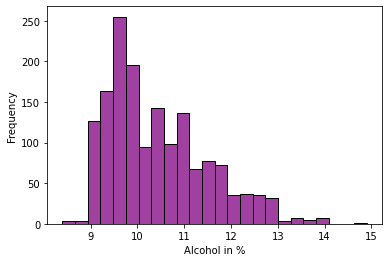

In [10]:
sns.histplot(data=red,x='alcohol',color='purple')
plt.xlabel("Alcohol in %")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

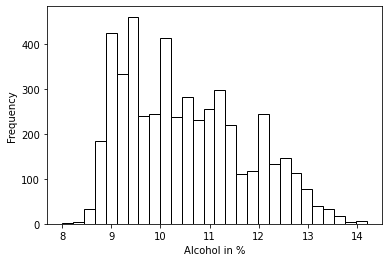

In [11]:
sns.histplot(data=white,x='alcohol',color='white')
plt.xlabel('Alcohol in %')
plt.ylabel('Frequency')

In [12]:
red['type']=1
white['type']=0
wines=red.append(white,ignore_index=True)
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [13]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [14]:
X=wines.iloc[:,0:11]
y=np.ravel(wines.type)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=45)
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
from keras.layers import BatchNormalization
model=Sequential()
model.add(Dense(units=12,activation='relu', input_shape=(11,)))

model.add(BatchNormalization())
model.add(Dense(units=9,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.3))
model.add(Dense(units=4,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=1,activation='sigmoid')) 

In [16]:
#from sklearn.metrics import *
model.output_shape
model.summary()
model.get_config()
model.get_weights()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 9)                 117       
                                                                 
 batch_normalization_1 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 4

In [17]:
model.fit(X_train,y_train,epochs=300,batch_size=55,verbose=1)
prediction=model.predict(X_test)
prediction


Epoch 1/300
83/83 [==============================] - 2s 3ms/step - loss: 0.4458 - accuracy: 0.8342
Epoch 2/300
83/83 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8980
Epoch 3/300
83/83 [==============================] - 0s 3ms/step - loss: 0.2830 - accuracy: 0.9140
Epoch 4/300
83/83 [==============================] - 0s 3ms/step - loss: 0.2519 - accuracy: 0.9224
Epoch 5/300
83/83 [==============================] - 0s 3ms/step - loss: 0.2307 - accuracy: 0.9272
Epoch 6/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 0.9408
Epoch 7/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1803 - accuracy: 0.9408
Epoch 8/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1636 - accuracy: 0.9472
Epoch 9/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1556 - accuracy: 0.9477
Epoch 10/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9532
Epoch 11/

array([[0.00434867],
       [0.00476393],
       [0.00199455],
       ...,
       [0.9994575 ],
       [0.0017693 ],
       [0.00500906]], dtype=float32)

In [18]:
from sklearn.metrics import accuracy_score
score=model.evaluate(X_test,y_test,verbose=1)
score[1]*(10**2)





61/61 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.9759


97.58974313735962